# 1. Data ingestion & inspection

Dalam bab ini, Anda akan diperkenalkan ke pandas DataFrames. Anda akan menggunakan pandas untuk mengimpor dan memeriksa berbagai datasets, mulai dari data populasi yang diperoleh dari Bank Dunia hingga data stok bulanan yang diperoleh melalui Yahoo Finance. Anda juga akan berlatih membangun DataFrames dari awal dan menjadi terbiasa dengan kemampuan visualisasi data intrinsik pandas.

## Review of Pandas DataFrames

### Inspecting your data

Anda bisa menggunakan metode DataFrame `.head()` dan `.tail()` untuk melihat beberapa baris pertama dan terakhir dari DataFrame. Dalam latihan ini, kami telah mengimpor pandas sebagai `pd` dan data populasi dimuat dari tahun 1960 hingga 2014 sebagai DataFrame `df`. Dataset ini diperoleh dari [Bank Dunia](http://databank.worldbank.org/data/reports.aspx?source=2&type=metadata&series=SP.URB.TOTL.IN.ZS#).

Tugas Anda adalah menggunakan `df.head()` dan `df.tail()` untuk memverifikasi bahwa baris pertama dan terakhir cocok dengan file pada disk. Dalam latihan selanjutnya, Anda akan melihat cara mengekstrak nilai dari DataFrames dengan pengindeksan, tetapi untuk saat ini, secara manual menyalin / menempelkan atau mengetikkan nilai ke dalam pernyataan penugasan bila diperlukan. Pilih jawaban yang benar untuk nilai pertama dan terakhir di kolom `'Year'` dan `'Total Population'`.

In [4]:
import pandas as pd

data = 'https://assets.datacamp.com/production/repositories/497/datasets/2175fef4b3691db03449bbc7ddffb740319c1131/world_ind_pop_data.csv'
df = pd.read_csv(data)


In [5]:
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [6]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


**Answer** : First: `1960, 92495902.0`; Last: `2014, 15245855.0`.

### DataFrame data types

Pandas menyadari tipe data di kolom DataFrame Anda. Ia juga mengetahui jenis null dan `NaN` ('Not-a-Number') yang sering menunjukkan data yang hilang. Dalam latihan ini, kami telah mengimpor pandas sebagai `pd` dan membaca data populasi dunia ke dalam DataFrame `df` yang berisi beberapa nilai `NaN` - nilai yang sering digunakan sebagai pengganti tempat untuk entri data yang hilang atau tidak valid.

Tugas Anda adalah menggunakan `df.info()` untuk menentukan informasi tentang jumlah total entri yang bukan nol (`non-null`) dan menyimpulkan jumlah total entri nol (`null`), yang kemungkinan menunjukkan data yang hilang.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


**Note** : Data di datacamp terdapat missing value, sehingga hasilnya tidak sama. (Data dari tipe campuran, dan 3460 float64 hilang.)

### NumPy and pandas working together

Pandas bergantung dan berinteroperasi dengan NumPy, pustaka Python untuk perhitungan array numerik yang cepat. Sebagai contoh, Anda bisa menggunakan atribut DataFrame `.values` untuk mewakili DataFrame `df` sebagai array NumPy. Anda juga dapat meneruskan struktur data pandas ke metode NumPy. Dalam latihan ini, kami telah mengimpor pandas sebagai `pd` dan data populasi dunia dimuat setiap 10 tahun sejak 1960 ke dalam DataFrame `df`. Dataset ini berasal dari yang digunakan dalam latihan sebelumnya.

Tugas Anda adalah mengekstrak nilai dan menyimpannya dalam array menggunakan atribut `.values`. Anda kemudian akan menggunakan nilai-nilai tersebut sebagai input ke metode NumPy `np.log10()` untuk menghitung logaritma basis 10 dari nilai populasi. Akhirnya, Anda akan melewatkan seluruh pandas DataFrame ke metode NumPy `np.log10()` yang sama dan membandingkan hasilnya.

In [11]:
data = 'https://assets.datacamp.com/production/repositories/497/datasets/cc1de7b583ec7eb6196df30845d32241fe15d643/world_population.csv'
df = pd.read_csv(data)

In [12]:
# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

**Note** : Sebagai ilmuwan data, Anda akan sering berinteraksi dengan array NumPy, Series pandas, dan DataFrames pandas, dan Anda akan memanfaatkan berbagai metode NumPy dan pandas untuk melakukan perhitungan yang Anda inginkan. Memahami bagaimana NumPy dan pandas bekerja bersama akan terbukti sangat berguna.

## Building DataFrames from scratch

### Zip lists to build a DataFrame

Dalam latihan ini, Anda akan membuat pandas DataFrame dari tiga negara teratas untuk memenangkan medali emas sejak 1896 dengan terlebih dahulu membangun `dictionary`. `list_keys` berisi nama kolom `'Country'` dan `'Total'`. `list_values` berisi nama lengkap masing-masing negara dan jumlah medali emas yang diberikan. Nilai telah diambil dari [Wikipedia](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table).

Tugas Anda adalah menggunakan list ini untuk membuat list tuple, menggunakan list tuple untuk membuat dictionary, dan kemudian menggunakan dictionary itu untuk membuat DataFrame. Dengan melakukannya, Anda akan menggunakan fungsi `list()`, `zip()`, `dict()` dan `pd.DataFrame()`. 

Catatan: Fungsi [zip()](https://docs.python.org/3/library/functions.html#zip) dalam Python 3 dan di atasnya mengembalikan objek zip khusus, yang pada dasarnya adalah generator. Untuk mengonversi objek `zip` ini menjadi list, Anda harus menggunakan `list()`. Anda dapat mempelajari lebih lanjut tentang fungsi `zip()` serta generator di Python [Data Science Toolbox (Bagian 2)](https://www.datacamp.com/courses/python-data-science-toolbox-part-2).

In [15]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [16]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


**Note** : Mampu membangun DataFrames dari awal adalah keterampilan yang penting.

### Labeling your data

Anda bisa menggunakan atribut DataFrame `df.columns` untuk melihat dan menetapkan label string baru ke kolom dalam pandas DataFrame.

Dalam latihan ini, kami telah mengimpor pandas sebagai `pd` dan mendefinisikan DataFrame `df` yang berisi hit Billboard teratas dari tahun 1980-an (dari [Wikipedia](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_1980s#1980)). Setiap baris memiliki tahun, artis, nama lagu dan jumlah minggu di bagian atas. Namun, DataFrame ini memiliki label kolom `a, b, c, d`. Tugas Anda adalah menggunakan atribut `df.columns` untuk menetapkan kembali label kolom deskriptif.

In [18]:
list_keys = ['a', 'b', 'c', 'd']
list_values = [[1980, 1981, 1982], ['Blondie', 'Christopher Cross', 'Joan Jett'], ['Call Me', 'Arthurs Theme', 'I Love Rock and Roll'], [6, 3, 7]]


In [19]:
zipped = list(zip(list_keys, list_values))
data = dict(zipped)
df = pd.DataFrame(data)
df

,a,b,c,d
0,1980,Blondie,Call Me,6
1,1981,Christopher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


In [20]:
# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df

,year,artist,song,chart weeks
0,1980,Blondie,Call Me,6
1,1981,Christopher Cross,Arthurs Theme,3
2,1982,Joan Jett,I Love Rock and Roll,7


**Note** : Anda sering harus mengganti nama nama kolom seperti ini agar lebih informatif.

### Building DataFrames with broadcasting

Anda secara implisit dapat menggunakan 'broadcasting', sebuah fitur NumPy, saat membuat pandas DataFrames. Dalam latihan ini, Anda akan membuat DataFrame kota di Pennsylvania yang berisi nama kota di satu kolom dan nama negara di yang kedua. Kami telah mengimpor nama 15 kota sebagai list `cities`.

Tugas Anda adalah membuat DataFrame dari list `cities` dan string `'PA'`.

In [21]:
# List cities
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']


In [22]:
# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


## Importing & exporting data

### Reading a flat file

Dalam latihan sebelumnya, kami telah memuat data untuk Anda menggunakan fungsi pandas `read_csv()`. Sekarang giliran Anda! Tugas Anda adalah membaca data populasi Bank Dunia yang Anda lihat sebelumnya ke dalam DataFrame menggunakan `read_csv()`. File tersedia di variabel `data_file`.

Langkah selanjutnya adalah membaca ulang file yang sama, tetapi secara bersamaan mengganti kolom menggunakan parameter input kata kunci `name`, set sama dengan list label kolom baru. Anda juga perlu mengatur `header=0` untuk mengganti nama label kolom.

Selesaikan dengan memeriksa hasilnya dengan `df.head()` dan `df.info()` di IPython Shell (mengubah `df` ke nama variabel DataFrame Anda).

In [23]:
data_file = 'https://assets.datacamp.com/production/repositories/497/datasets/cc1de7b583ec7eb6196df30845d32241fe15d643/world_population.csv'

In [24]:
# Read in the file: df1
df1 = pd.read_csv(data_file)

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv(data_file, header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


**Note** : Mengetahui cara membaca file flat menggunakan pandas adalah keterampilan penting.

### Delimiters, headers, and extensions

Tidak semua file data bersih dan rapi. Pandas menyediakan metode untuk membaca file data yang tidak terlalu sempurna yang Anda temui terlalu sering.

Dalam latihan ini, Anda memiliki data stok bulanan untuk empat perusahaan yang diunduh dari [Yahoo Finance](http://finance.yahoo.com/). Data disimpan sebagai satu baris untuk setiap perusahaan dan setiap kolom adalah harga penutupan akhir bulan. Nama file diberikan kepada Anda dalam variabel `file_messy`.

Selain itu, file ini memiliki tiga aspek yang dapat menyebabkan masalah untuk alat yang lebih sedikit: beberapa baris header, catatan komentar (baris) disisipkan di seluruh baris data, dan pembatas ruang alih-alih koma.

Tugas Anda adalah menggunakan pandas untuk membaca data dari `file_messy` yang bermasalah ini menggunakan opsi input non-default dengan `read_csv()` untuk merapikan kekacauan pada waktu baca. Kemudian, tulis data yang telah dibersihkan ke file CSV dengan variabel `file_clean` yang telah disiapkan untuk Anda, seperti yang mungkin Anda lakukan dalam alur kerja data nyata.

In [25]:
file_messy = 'https://assets.datacamp.com/production/repositories/497/datasets/4e8cdfbf9e125bb723981f9218bee16194c7d869/messy_stock_data.tsv'


In [29]:
# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
df1.head()

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


In [33]:
# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
df2.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [ ]:
# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

**Note** : Sangat penting untuk dapat menyimpan DataFrames Anda yang sudah dibersihkan dalam format file yang diinginkan!

## Plotting with pandas

### Plotting series using pandas

Visualisasi data seringkali merupakan langkah pertama yang sangat efektif dalam memperoleh pemahaman kasar tentang dataset yang akan dianalisis. Pandas menyediakan visualisasi data oleh keduanya tergantung dan beroperasi dengan perpustakaan matplotlib. Anda sekarang akan menjelajahi beberapa mekanisme dasar plotting dengan pandas serta opsi matplotlib terkait. Kami telah memuat sebelumnya pandas DataFrame `df` yang berisi data yang Anda butuhkan. Tugas Anda adalah menggunakan metode DataFrame `df.plot()` untuk memvisualisasikan data, dan kemudian menjelajahi parameter input matplotlib opsional yang diterima metode `.plot()` ini.

Metode panda `.plot()` melakukan panggilan ke matplotlib untuk membangun plot. Ini berarti bahwa Anda dapat menggunakan keterampilan yang telah Anda pelajari dalam kursus visualisasi sebelumnya untuk menyesuaikan plot. Dalam latihan ini, Anda akan menambahkan judul khusus dan label sumbu pada gambar.

Sebelum melakukan plot, periksa DataFrame di IPython Shell menggunakan `df.head()`. Juga, gunakan `type(df)` dan perhatikan bahwa itu adalah DataFrame kolom tunggal.

In [54]:
list_keys = ['Temperature (deg F)']
list_values = [[79.0, 77.4, 76.4, 75.7, 75.1, 74.6, 74.5, 76.0, 79.8, 83.3, 86.6, 89.3, 91.6, 93.2, 94.4, 95.0, 94.8, 93.9, 92.4, 89.9, 86.1, 83.6, 81.8, 80.0, 79.1, 77.4, 76.5, 75.8, 75.2, 74.6, 74.6, 76.1, 79.8, 83.3, 86.5, 89.4, 91.6, 93.2, 94.4, 95.0, 94.8, 93.9, 92.4, 89.8, 86.1, 83.6, 81.8, 80.1, 79.1, 77.5, 76.5, 75.8, 75.2, 74.6, 74.5, 76.0, 79.8, 83.4, 86.6, 89.4, 91.7, 93.3, 94.5, 95.1, 94.9, 94.1, 92.5, 89.8, 86.0, 83.5, 81.9, 80.1, 79.2, 77.6, 76.6, 75.9, 75.3, 74.7, 74.6, 76.0, 79.9, 83.5, 86.7, 89.5, 91.9, 93.4, 94.6, 95.1, 95.0, 94.1, 92.5, 89.7, 86.0, 83.5, 81.9, 80.2, 79.2, 77.6, 76.6, 75.9, 75.3, 74.7, 74.6, 76.1, 79.8, 83.4, 86.6, 89.5, 91.9, 93.4, 94.5, 95.1, 94.9, 94.1, 92.4, 89.6, 85.9, 83.4, 81.8, 80.1, 79.2, 77.6, 76.6, 75.9, 75.3, 74.6, 74.6, 76.0, 79.7, 83.4, 86.6, 89.5, 91.8, 93.4, 94.5, 95.2, 95.0, 94.1, 92.5, 89.6, 85.9, 83.4, 81.8, 80.0, 79.2, 77.5, 76.5, 75.8, 75.2, 74.6, 74.6, 76.0, 79.7, 83.3, 86.5, 89.4, 91.8, 93.4, 94.5, 95.3, 95.0, 94.1, 92.4, 89.5, 85.8, 83.3, 81.7, 80.0, 79.2, 77.5, 76.5, 75.8, 75.2, 74.6, 74.6, 75.9, 79.7, 83.3, 86.5, 89.4, 91.7, 93.3, 94.5, 95.2, 94.9, 94.1, 92.4, 89.5, 85.7, 83.3, 81.7, 80.0, 79.2, 77.5, 76.5, 75.8, 75.2, 74.6, 74.6, 75.9, 79.7, 83.3, 86.4, 89.4, 91.7, 93.3, 94.5, 95.2, 94.9, 94.1, 92.2, 89.3, 85.6, 83.2, 81.6, 79.9, 79.1, 77.4, 76.4, 75.8, 75.2, 74.6, 74.6, 75.9, 79.6, 83.3, 86.4, 89.4, 91.7, 93.2, 94.4, 95.1, 94.8, 94.1, 92.3, 89.2, 85.6, 83.2, 81.6, 79.9, 79.1, 77.4, 76.5, 75.8, 75.3, 74.7, 74.6, 75.9, 79.6, 83.3, 86.4, 89.3, 91.7, 93.2, 94.4, 95.0, 94.7, 94.0, 92.1, 89.0, 85.5, 83.1, 81.6, 80.0, 79.2, 77.5, 76.5, 75.8, 75.3, 74.8, 74.7, 75.9, 79.6, 83.2, 86.4, 89.2, 91.6, 93.1, 94.4, 94.9, 94.7, 94.0, 92.1, 89.0, 85.5, 83.2, 81.7, 80.1, 79.2, 77.5, 76.6, 75.9, 75.4, 74.8, 74.7, 75.9, 79.6, 83.2, 86.4, 89.3, 91.6, 93.2, 94.4, 95.0, 94.8, 94.1, 92.3, 89.2, 85.7, 83.4, 81.7, 80.2, 79.2, 77.5, 76.5, 75.9, 75.4, 74.9, 74.7, 75.9, 79.5, 83.1, 86.3, 89.2, 91.5, 93.1, 94.3, 94.9, 94.7, 94.0, 92.1, 89.0, 85.6, 83.3, 81.6, 80.1, 79.1, 77.4, 76.4, 75.8, 75.3, 74.8, 74.7, 75.8, 79.5, 83.1, 86.2, 89.1, 91.4, 93.0, 94.2, 94.7, 94.6, 93.9, 91.9, 88.8, 85.5, 83.3, 81.6, 80.0, 79.1, 77.4, 76.5, 75.9, 75.3, 74.8, 74.7, 75.8, 79.4, 83.1, 86.2, 89.0, 91.4, 93.0, 94.2, 94.7, 94.6, 94.0, 92.0, 88.9, 85.5, 83.4, 81.7, 80.1, 79.2, 77.5, 76.6, 75.9, 75.3, 74.8, 74.8, 75.9, 79.5, 83.2, 86.3, 89.1, 91.5, 93.1, 94.3, 94.8, 94.6, 94.0, 92.0, 88.8, 85.5, 83.3, 81.6, 80.1, 79.2, 77.5, 76.6, 75.9, 75.4, 74.9, 74.8, 75.9, 79.5, 83.1, 86.3, 89.1, 91.5, 93.1, 94.3, 94.8, 94.6, 93.9, 91.9, 88.8, 85.6, 83.4, 81.7, 80.1, 79.2, 77.5, 76.6, 75.9, 75.3, 74.9, 74.8, 75.8, 79.5, 83.1, 86.3, 89.1, 91.5, 93.1, 94.3, 94.8, 94.7, 94.0, 92.1, 88.9, 85.7, 83.5, 81.7, 80.2, 79.2, 77.6, 76.6, 75.9, 75.3, 74.8, 74.7, 75.8, 79.5, 83.2, 86.4, 89.2, 91.5, 93.2, 94.4, 94.8, 94.7, 94.1, 92.1, 88.9, 85.7, 83.5, 81.8, 80.2, 79.3, 77.6, 76.6, 75.9, 75.3, 74.8, 74.7, 75.7, 79.4, 83.1, 86.3, 89.1, 91.4, 93.1, 94.3, 94.7, 94.6, 94.0, 92.0, 88.7, 85.5, 83.4, 81.7, 80.1, 79.2, 77.5, 76.5, 75.8, 75.2, 74.8, 74.7, 75.6, 79.4, 83.0, 86.3, 89.0, 91.4, 93.0, 94.2, 94.6, 94.6, 93.8, 91.7, 88.5, 85.4, 83.3, 81.6, 80.0, 79.1, 77.4, 76.5, 75.7, 75.1, 74.6, 74.5, 75.5, 79.2, 82.9, 86.2, 88.9, 91.3, 92.8, 94.0, 94.5, 94.5, 93.7, 91.6, 88.3, 85.2, 83.1, 81.4, 79.9, 78.9, 77.3, 76.4, 75.7, 75.0, 74.5, 74.4, 75.4, 79.2, 82.9, 86.2, 88.8, 91.1, 92.7, 93.9, 94.3, 94.3, 93.5, 91.5, 88.2, 85.1, 83.0, 81.3, 79.7, 78.9, 77.3, 76.4, 75.6, 74.9, 74.5, 74.3, 75.3, 79.1, 82.7, 86.0, 88.7, 91.0, 92.6, 93.8, 94.1, 94.0, 93.2, 91.2, 87.9, 84.9, 82.7, 81.0, 79.6, 78.8, 77.2, 76.2, 75.5, 74.8, 74.4, 74.2, 75.2, 79.0, 82.6, 85.9, 88.6, 90.9, 92.4, 93.6, 94.0, 93.9, 93.0, 91.0, 87.8, 84.7, 82.6, 81.0, 79.4, 78.6, 77.0, 76.2, 75.4, 74.7, 74.2, 74.1, 75.0, 78.9, 82.6, 85.8, 88.6, 90.8, 92.3, 93.3, 93.7, 93.6, 92.7, 90.7, 87.5, 84.4, 82.2, 80.7, 79.2, 78.4, 76.9, 76.0, 75.3, 74.6, 74.1, 74.0, 74.9, 78.7, 82.4, 85.7, 88.4, 90.6, 92.1, 93.1, 93.5, 93.3, 92.3, 90.3, 87.1, 84.1, 81.9, 80.4, 78.9, 78.2, 76.7, 75.9, 75.1, 74.5, 74.0, 73.8, 74.7, 78.5, 82.2, 85.5, 88.2, 90.4, 91.9, 92.9, 93.3, 93.2, 92.2, 90.1, 86.9, 83.9, 81.7, 80.1, 78.7, 78.0, 76.5, 75.7, 74.9, 74.3, 73.7, 73.7, 74.5, 78.3, 82.1, 85.4, 88.1, 90.4, 91.8, 92.8, 93.3, 93.1, 92.1, 90.0, 86.8, 83.7, 81.5, 79.9, 78.4, 77.8, 76.3, 75.5, 74.7, 74.1, 73.5, 73.4, 74.3, 78.1, 81.9, 85.2, 87.9, 90.1, 91.6, 92.6, 93.1, 93.0, 91.9, 89.8, 86.6, 83.4, 81.2, 79.7, 78.2]]


In [55]:
zipped = list(zip(list_keys, list_values))
data = dict(zipped)
df = pd.DataFrame(data)

In [56]:
df.head()

,Temperature (deg F)
0,79.0
1,77.4
2,76.4
3,75.7
4,75.1


In [59]:
type(df)

pandas.core.frame.DataFrame

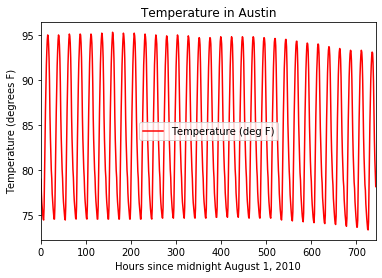

In [62]:
import matplotlib.pyplot as plt

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

### Plotting DataFrames

Membandingkan data dari beberapa kolom bisa sangat mencerahkan. Pandas membuatnya mudah dengan DataFrames multi-kolom. Secara default, memanggil `df.plot()` akan menyebabkan pandas melakukan plot berlebihan pada semua kolom data, dengan setiap kolom sebagai satu baris. Dalam latihan ini, kami telah memuat tiga kolom data dari kumpulan data cuaca - suhu, titik embun, dan tekanan - tetapi masalahnya adalah tekanan memiliki unit ukuran yang berbeda. Data tekanan, diukur dalam Atmospheres, memiliki skala vertikal yang berbeda dari dua kolom data lainnya, yang keduanya diukur dalam derajat Fahrenheit.

Tugas Anda adalah memplot semua kolom sebagai plot multi-garis, untuk melihat sifat masalah penskalaan vertikal. Kemudian, gunakan list nama kolom yang diteruskan ke DataFrame `df[column_list]` untuk membatasi plot hanya satu kolom, dan kemudian hanya 2 kolom data. Setelah selesai, Anda akan membuat 4 plot.

In [74]:
df = pd.read_csv('weather_f.csv')
df.head()

,Temperature (deg F),Dew Point (deg F),Pressure (atm)
0,79.0,70.8,1.0
1,77.4,71.2,1.0
2,76.4,71.3,1.0
3,75.7,71.4,1.0
4,75.1,71.4,1.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
Temperature (deg F)    744 non-null float64
Dew Point (deg F)      744 non-null float64
Pressure (atm)         744 non-null float64
dtypes: float64(3)
memory usage: 17.6 KB


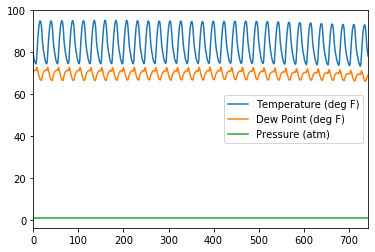

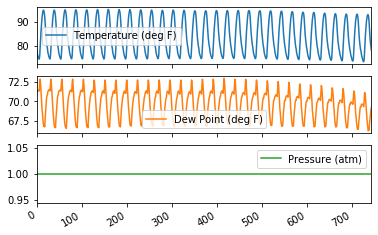

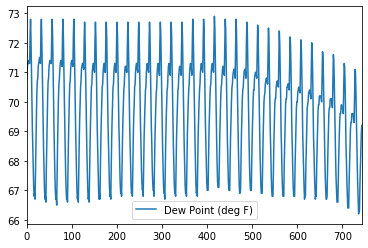

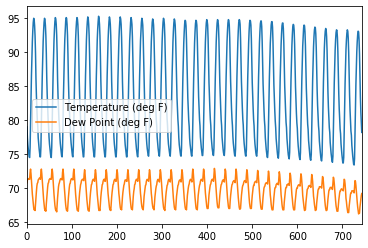

In [77]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()